/var/folders/rb/rx0t_fxx0gn2216d3_lrhp0h0000gn/T/ipykernel_95537/3962451964.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


5th Percentile: 213.78
50th Percentile: 295.73
95th Percentile: 408.56


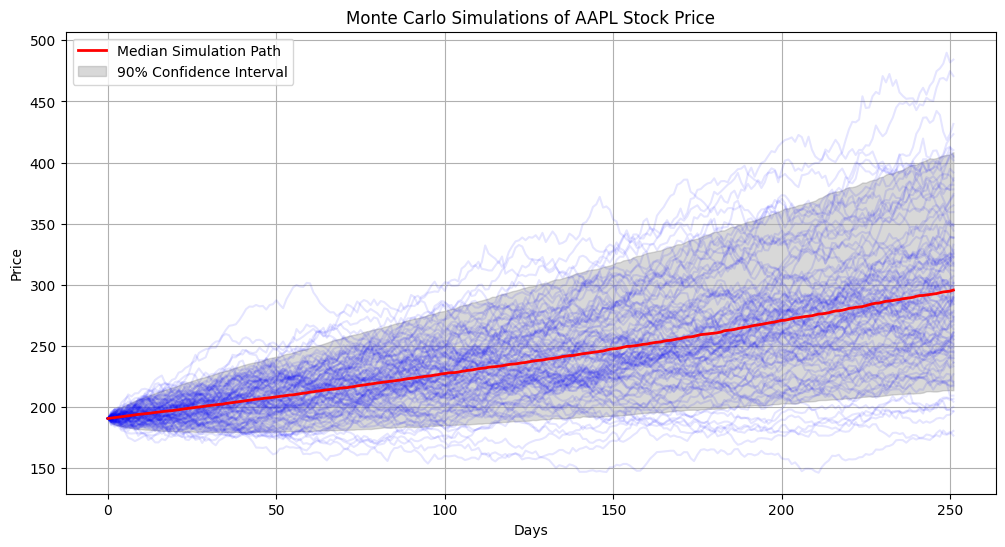

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)
prices = data['Close'].values

returns = np.diff(prices) / prices[:-1]

mean_return = np.mean(returns)
std_return = np.std(returns)

num_simulations = 10000
num_days = 252

last_price = prices[-1]

simulations = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    prices_sim = [last_price]
    for day in range(num_days - 1):
        random_return = np.random.normal(mean_return, std_return)
        new_price = prices_sim[-1] * (1 + random_return)
        prices_sim.append(new_price)
    simulations[i] = prices_sim

final_prices = simulations[:, -1]
percentiles = np.percentile(final_prices, [5, 50, 95])

print(f"5th Percentile: {percentiles[0]:.2f}")
print(f"50th Percentile: {percentiles[1]:.2f}")
print(f"95th Percentile: {percentiles[2]:.2f}")

plt.figure(figsize=(12,6))
for i in range(100):
    plt.plot(simulations[i], color='blue', alpha=0.1)

median_path = np.percentile(simulations, 50, axis=0)
plt.plot(median_path, color='red', label='Median Simulation Path', linewidth=2)

plt.fill_between(
    range(num_days),
    np.percentile(simulations, 5, axis=0),
    np.percentile(simulations, 95, axis=0),
    color='grey', alpha=0.3,
    label="90% Confidence Interval"
)
plt.title(f"Monte Carlo Simulations of {ticker} Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()